# Importando as libs


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importando o dataset

In [4]:
dados = pd.read_csv('dados/Consumo_cerveja.csv', ';')

# Informações iniciais do dataset


In [5]:
dados.shape

(365, 7)

In [6]:
dados.head()

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
data          365 non-null object
temp_media    365 non-null float64
temp_min      365 non-null float64
temp_max      365 non-null float64
chuva         365 non-null float64
fds           365 non-null int64
consumo       365 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [8]:
dados.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


# Descrição das variáveis
- data = dia de coleta.
- temp_media = média da temperatura ambiente registrada
- temp_min = temperatura mínima ambiente registrada
- temp_max = temperatura máxima ambiente registrada
- chuva = Precipitação(mm) 
- fds= Final de Semana (1= Sim, 0=Não)
- consumo= Consumo de Cerveja (litros)


# Matriz de correlação

- Relação lineares entre as variáveis, uma medida de associação que está entre 1 e -1.
- Quando uma variável está subindo e a outra caindo, é uma associação negativa.
- Quando uma variável está subindo e a outra também sobre, é uma associação positiva.

In [9]:
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


- Podemos observer que o "consumo" e "tem_max" possuem associação positiva.
- "consumo" e "fds" também possuem uma associação positiva
- "consumo" e "chuva" possuem uma associação negativa

#### Isso pode significar que quando a temperatura está alta o consumo cresce, assim como no final de semana o consumo também aumenta
#### Em dias de chuva o consumo não é alto

# Gerando gráfico da variável dependente

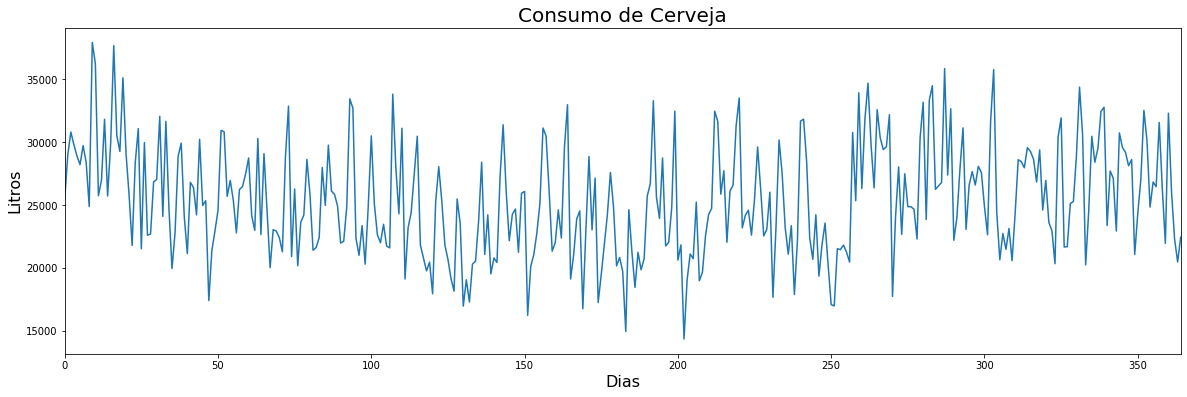

In [10]:
fig, ax = plt.subplots(figsize = (20, 6))
ax.set_title('Consumo de Cerveja', fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Dias', fontsize = 16)
ax = dados['consumo'].plot()


# Boxplot


In [11]:
import seaborn as sns

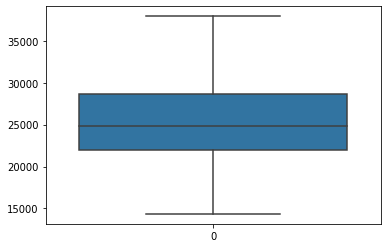

In [12]:
ax = sns.boxplot(data = dados['consumo'], orient = '')